# Imports 

In [1]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt

# Full dataset
Load gridtx-dump

In [2]:
# Load gridtx dump 
dtype={'adjusts_id': 'object',
       'ediel_product_code': 'float64',
       'invoice_item_id': 'object',
       'parent_id': 'object',
       'meter_id': 'object'}

file = "data/gridtx-dump.csv"
df = dd.read_csv(file, sep=";", dtype=dtype)

Explore gridtx dump

In [3]:
# Get uniqe meter ids 
meter_ids = df["meter_id"].unique().compute()
len(meter_ids)

1969

In [48]:
# Get number of rows in dataframe
num_rows = len(df)
num_rows

40075583

In [50]:
# Number of unique rows in dataset
unique_rows = len(df.drop_duplicates())
unique_rows


In [46]:
# Check if timeslot is uniqe
timeslot_unique_count = df[["timeslot","meter_id", "type"]].drop_duplicates().shape[0].compute()
timeslot_unique_count

24440788

In [3]:
# Descibe data 
df.describe().compute()

,num_kwh,spot_price_no_vat,amount_no_vat,amount_with_vat,vat_percent,ediel_product_code,kwh_fee_no_vat
count,4.007558e+07,4.002075e+07,4.007558e+07,4.007558e+07,4.007558e+07,3.997582e+07,4.007558e+07
mean,1.261181e+00,-1.191252e-01,1.322791e-03,1.862953e-03,1.670095e+01,1.491748e+03,1.492465e-02
std,5.996560e+00,6.360822e-01,2.223072e+01,2.746402e+01,1.177294e+01,8.819701e+00,2.259279e-02
min,-1.560000e+03,-1.116000e+00,-9.646320e+03,-1.205790e+04,0.000000e+00,1.481000e+03,0.000000e+00
25%,0.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,2.500000e+01,1.491000e+03,0.000000e+00
50%,0.000000e+00,3.722800e-01,0.000000e+00,0.000000e+00,2.500000e+01,1.491000e+03,0.000000e+00
75%,2.047500e+00,5.370600e-01,1.261000e+00,1.577000e+00,2.500000e+01,1.491000e+03,5.600000e-02
max,2.347000e+03,2.454310e+00,6.255580e+03,7.819480e+03,2.500000e+01,1.591000e+03,5.600000e-02


In [16]:
meter_row_counts = df["meter_id"].value_counts().compute()

# Aggregated data
Create dataset grouped by type and meter id

In [9]:
df_new = df.groupby(["meter_id", "type", "timeslot"]).sum().reset_index()


In [61]:
df_new.to_csv(f"data/gridtx-dump-AGGREGATED-TIMESLOT.csv", index= None, header = True, single_file=True)

['c:\\Users\\andre\\OneDrive - Danmarks Tekniske Universitet\\02466 Project work - Bachelor of Artificial Intelligence and Data\\Project-Work---Bsc.-AIDS\\data\\gridtx-dump-AGGREGATED-TIMESLOT.csv']

Load the newly created dataset

In [10]:
# Load new dataset 
# Load gridtx dump 
dtype={'adjusts_id': 'object',
       'ediel_product_code': 'float64',
       'invoice_item_id': 'object',
       'parent_id': 'object',
       'meter_id': 'object'}

file = "data/gridtx-dump-AGGREGATED-timeslot-type-meterid.csv"
df_new = dd.read_csv(file, sep=",", dtype=dtype)

In [5]:
meter_ids = list(df_new["meter_id"].drop_duplicates().compute())

# New metering-point data
Creates a new metering-point dataset so we only include meters that are in our gridtx dataset

In [5]:
meters = pd.read_csv("data/grid-metering-point-dump-plus-zipcode-GMAPS.csv")
print("Number of rows in meters dataset: ", str(len(meters)))
new_meters = meters[meters.idgrid_data_table.isin(meter_ids)]
print("Number of rows in new meters dataset: ", str(len(new_meters)))

Number of rows in meters dataset:  2049
Number of rows in new meters dataset:  1968


In [6]:
new_meters.to_csv("data/grid-metering-point-dump-plus-zipcode-GMAPS-in-gridtx.csv")

# Explore new meters dataset
Explore the newly created dataset

In [7]:
# Load data
new_meters = pd.read_csv("data/grid-metering-point-dump-plus-zipcode-GMAPS-in-gridtx.csv")

new_meters = new_meters[['idgrid_data_table', 'created_atgrid_data_table',
       'updated_atgrid_data_table', 'meter_number', 'ean', 'automatic_meter',
       'street_address', 'grid_owner_id', 'metering_grid_area', 'zip_code_id',
       'provider', 'settlement_method', 'market_balance_area', 'code', 'name',
       'idzipcode_table', 'created_atzipcode_table', 'updated_atzipcode_table',
       'country', 'full_address', 'lat', 'lng']]


In [11]:
new_meters[new_meters["lat"]  == max(new_meters["lat"])]
new_meters[new_meters["idgrid_data_table"] == "45411724-e84b-4c0d-b16d-e3044a552d19"]

new_meters[new_meters["lat"] == max(new_meters[new_meters["idgrid_data_table"].isin(NO1_meters)]["lat"])]

new_meters[new_meters["market_balance_area"] == "NO4"]


,idgrid_data_table,created_atgrid_data_table,updated_atgrid_data_table,meter_number,ean,automatic_meter,street_address,grid_owner_id,metering_grid_area,zip_code_id,...,market_balance_area,code,name,idzipcode_table,created_atzipcode_table,updated_atzipcode_table,country,full_address,lat,lng
1243,45411724-e84b-4c0d-b16d-e3044a552d19,2018-06-14 13:19:24.793678+02,2018-08-07 14:31:01.348274+02,5706567269060081,707057500062738089,t,Uranusvegen 48,ccd99972-760e-4877-bfc5-85965a53c436,50YXBU3F1E25LBGK,2b3fdb93-b327-4b6b-9873-e172343d498f,...,NO4,9024,Tomasjord,2b3fdb93-b327-4b6b-9873-e172343d498f,2017-10-04 22:12:45.370070+00:00,2018-10-10 07:52:26.865131+00:00,no,"Tomasjord, Tromsø, Norway",69.659448,19.018229
1880,67dbbec6-d4fd-4313-b7e6-69c3f68057b2,2017-02-02 19:49:43.886517+01,2018-11-15 12:45:19.639703+01,137027,707057500062442702,t,Hamnveien 21,ccd99972-760e-4877-bfc5-85965a53c436,50YXBU3F1E25LBGK,31759144-f77b-4d94-acd4-3a9f1f1d8da0,...,NO4,9385,Skaland,31759144-f77b-4d94-acd4-3a9f1f1d8da0,2017-10-04 22:12:45.370070+00:00,2018-10-10 07:53:55.832764+00:00,no,"Skaland, Norway",69.444542,17.298257


In [12]:
# Get ids for each bidding zone 

NO1_meters = list(new_meters[new_meters["market_balance_area"] == "NO1"]["idgrid_data_table"])
NO2_meters = list(new_meters[new_meters["market_balance_area"] == "NO2"]["idgrid_data_table"])
NO3_meters = list(new_meters[new_meters["market_balance_area"] == "NO3"]["idgrid_data_table"])
NO4_meters = list(new_meters[new_meters["market_balance_area"] == "NO4"]["idgrid_data_table"])
NO5_meters = list(new_meters[new_meters["market_balance_area"] == "NO5"]["idgrid_data_table"])
print("Count of automatic and non-automatix meters")
print(new_meters["market_balance_area"].value_counts())


# Get ids for automatic and non-automatic meters
non_automatic_meters = list(new_meters[new_meters["automatic_meter"] == "f"]["idgrid_data_table"])
automatic_meters = list(new_meters[new_meters["automatic_meter"] == "t"]["idgrid_data_table"])
print("Count of automatic and non-automatix meters")
print(new_meters["automatic_meter"].value_counts())


# Get hourly meters by code 
# hourly_meter_codes = [1491, 1481]
hourly_meters = new_meters[(new_meters["code"] == 1491) | (new_meters["code"] == 1481)]
daily_meters = new_meters[(new_meters["code"] == 1591) | (new_meters["code"] == 1581)]
print(f"There are {len(hourly_meters)} hourly meters")
print(f"There are {len(daily_meters)} daily meters")


# Get ids for each settlement method 
print("Count for each settlement method")
Z32_meters = list(new_meters[new_meters["settlement_method"] == "Z32"]["idgrid_data_table"])
Z31_meters = list(new_meters[new_meters["settlement_method"] == "Z31"]["idgrid_data_table"])

new_meters["settlement_method"].value_counts()


Count of automatic and non-automatix meters
NO1    1570
NO2     282
NO5      59
NO3      55
NO4       2
Name: market_balance_area, dtype: int64
Count of automatic and non-automatix meters
t    1907
f      61
Name: automatic_meter, dtype: int64
There are 7 hourly meters
There are 0 daily meters
Count for each settlement method


Z32    1821
Z31     147
Name: settlement_method, dtype: int64

Create list of ids to keep

In [13]:
ids_to_keep = list(new_meters["idgrid_data_table"])

updated_meter_ids = [id for id in ids_to_keep if id not in non_automatic_meters]
updated_meter_ids = [id for id in updated_meter_ids if id not in Z31_meters]
updated_meter_ids = [id for id in updated_meter_ids if id in NO1_meters]

print(f"{len(updated_meter_ids)} meters in the updated dataset")

1456 meters in the updated dataset


## PLOTS

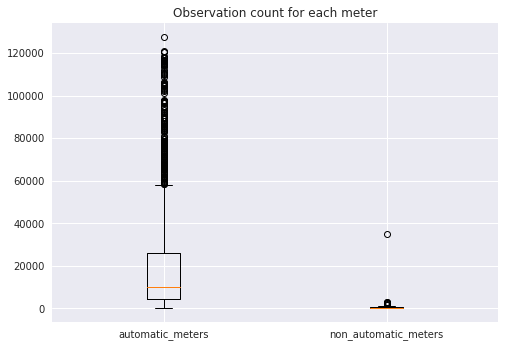

In [17]:
# Plot automatic and non-automatic meters 
with plt.style.context("seaborn"):
    plt.boxplot([meter_row_counts[automatic_meters], meter_row_counts[non_automatic_meters]])
    plt.title("Observation count for each meter")
    plt.xticks([1, 2], ['automatic_meters', 'non_automatic_meters'])


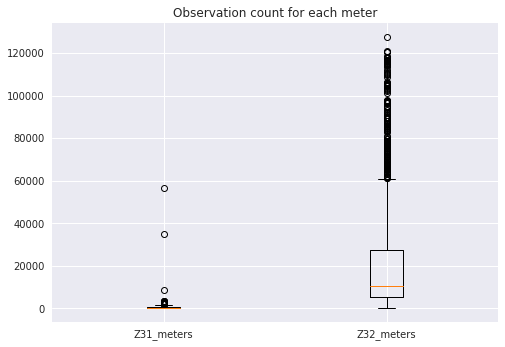

In [170]:
# Plot settlement method 
with plt.style.context("seaborn"):
    plt.boxplot([meter_row_counts[Z31_meters], meter_row_counts[Z32_meters]])
    plt.title("Observation count for each meter")
    plt.xticks([1, 2], ['Z31_meters', 'Z32_meters'])

In [181]:
max(new_meters["lat"])

69.6655511

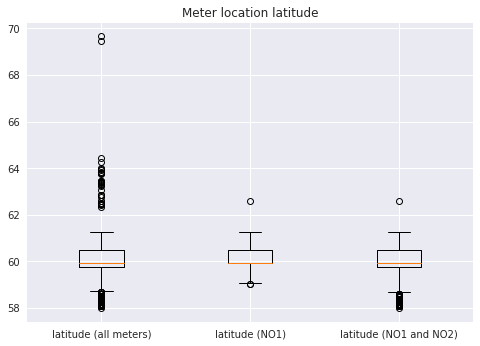

In [15]:
with plt.style.context("seaborn"):
    plt.boxplot([ new_meters["lat"], new_meters[new_meters["idgrid_data_table"].isin(NO1_meters)]["lat"], new_meters[(new_meters["idgrid_data_table"].isin(NO1_meters)) | (new_meters["idgrid_data_table"].isin(NO2_meters))]["lat"] ])
    plt.title("Meter location latitude")
    plt.xticks([1, 2, 3], ['latitude (all meters)', 'latitude (NO1)', 'latitude (NO1 and NO2)'])


1456 meters in the updated dataset


In [ ]:
# hourly_meter_ids = list(new_meters[(new_meters["code"] < 1500) & (new_meters["code"] >= 1400)]["idgrid_data_table"])
# daily_meter_ids = list(new_meters[(new_meters["code"] < 1600) & (new_meters["code"] >= 1500)]["idgrid_data_table"])

98

## New dataset
Create new dataset from aggregated data and with the new meter ids

In [14]:
df_new_new = df_new[df_new.meter_id.isin(updated_meter_ids)]

In [124]:
df_new_new.to_csv(f"data/gridtx-dump-AGGREGATED-CLEANED.csv", index= None, header = True, single_file=True)

['c:\\Users\\andre\\OneDrive - Danmarks Tekniske Universitet\\02466 Project work - Bachelor of Artificial Intelligence and Data\\Project-Work---Bsc.-AIDS\\data\\gridtx-dump-AGGREGATED-CLEANED.csv']

In [135]:
ttt = df_new_new.groupby("meter_id")["timeslot"].nunique().compute()

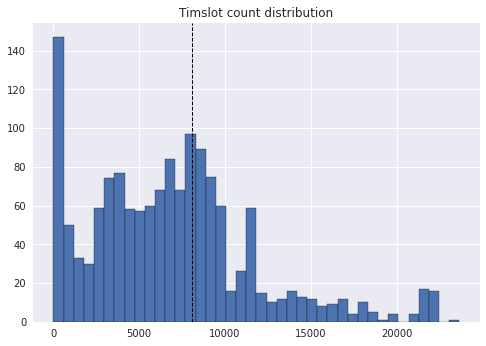

In [149]:
threshold = 8064

with plt.style.context("seaborn"):
    plt.hist(ttt, bins = 40, edgecolor="black")
    plt.axvline(threshold, color='k', linestyle='dashed', linewidth=1)
    plt.title("Timslot count distribution")

In [147]:
sum(ttt >= 8064)

531

In [154]:
updated_meter_ids_new = list(ttt[ttt >= 8064].index)

In [155]:
df_new_new_new = df_new_new[df_new_new.meter_id.isin(updated_meter_ids_new)]

In [156]:
df_new_new_new.to_csv(f"data/gridtx-dump-AGGREGATED-CLEANED-THRESHOLD.csv", index= None, header = True, single_file=True)

['c:\\Users\\andre\\OneDrive - Danmarks Tekniske Universitet\\02466 Project work - Bachelor of Artificial Intelligence and Data\\Project-Work---Bsc.-AIDS\\data\\gridtx-dump-AGGREGATED-CLEANED-THRESHOLD.csv']

# Explore Aggregated Cleaned Threshold


In [239]:
# Load data 
dtype={'adjusts_id': 'object',
       'ediel_product_code': 'float64',
       'invoice_item_id': 'object',
       'parent_id': 'object',
       'meter_id': 'str'}

file = "data/gridtx-dump-AGGREGATED-CLEANED-THRESHOLD.csv"
df_threshold = dd.read_csv(file, sep=",", dtype=dtype)

In [218]:
df_threshold.columns

Index(['meter_id', 'type', 'timeslot', 'num_kwh', 'spot_price_no_vat',
       'amount_no_vat', 'amount_with_vat', 'vat_percent', 'ediel_product_code',
       'kwh_fee_no_vat'],
      dtype='object')

In [252]:
cons_numkwh_neg_counts = df_threshold[(df_threshold["type"] == "consumption") & (df_threshold["num_kwh"] < 0)]["num_kwh"].value_counts().compute()
prod_numkwh_neg_counts = df_threshold[(df_threshold["type"] == "production") & (df_threshold["num_kwh"] < 0)]["num_kwh"].value_counts().compute()

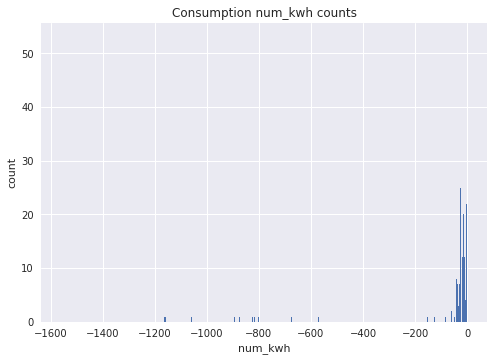

In [259]:
# Create barplot of cons_numkwh_neg_counts
with plt.style.context("seaborn"):
    plt.bar(cons_numkwh_neg_counts.index, cons_numkwh_neg_counts.values)
    plt.title("Consumption num_kwh counts")
    plt.xlabel("num_kwh")
    plt.ylabel("count")

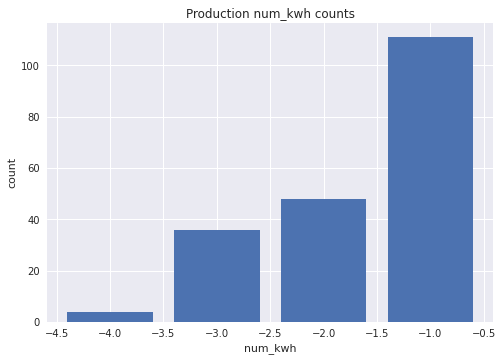

In [262]:
# Create barplot of cons_numkwh_neg_counts
with plt.style.context("seaborn"):
    plt.bar(prod_numkwh_neg_counts.index, prod_numkwh_neg_counts.values)
    plt.title("Production num_kwh counts")
    plt.xlabel("num_kwh")
    plt.ylabel("count")

KeyboardInterrupt: 

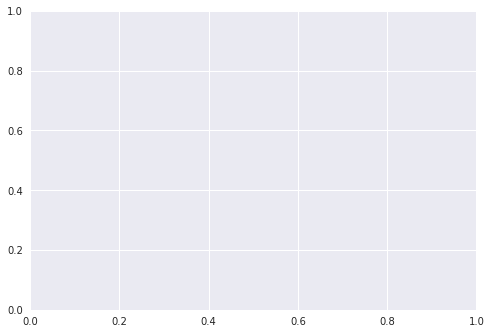

In [241]:
Create barplot of num_kwh accross all meters


In [160]:
df_threshold.meter_id.value_counts().compute()

28ba7f57-6e83-4341-8078-232c1639e4e3    63966
e3c18c2d-30f1-432e-bbfa-ee5d0117987e    60311
60ad4a18-0ca3-48e4-8289-a2a0ee15c3bd    59230
028b54e1-6594-4fca-ba0d-bfbb5f9a8b6f    59226
29964561-4c45-4dbb-bc91-4a4e35fa9d67    59225
                                        ...  
0361b668-4146-4d91-9f39-a9cdf23eadca     9349
25d76a7a-8e27-4fc4-8d75-abf620d9c740     9349
1f7e4f08-b7e8-4e3f-b4fe-ec5440d78b1d     9253
423c0929-b07c-489b-b4d7-680e54a06737     9253
a3f0c342-9f50-4626-9f78-18c54836a5be     8906
Name: meter_id, Length: 531, dtype: int64

In [235]:
meters_less_than_0 = df_threshold[df_threshold["num_kwh"] < 0].compute()

In [236]:
meters_less_than_0

,meter_id,type,timeslot,num_kwh,spot_price_no_vat,amount_no_vat,amount_with_vat,vat_percent,ediel_product_code,kwh_fee_no_vat
21318,4274df56-bcee-4906-86e5-d0f016f3b8cf,consumption,2017-10-01 00:00:00+02,-85.0,0.245,-20.789,-25.987,25,1591.0,0.0
21319,4274df56-bcee-4906-86e5-d0f016f3b8cf,consumption,2017-10-02 00:00:00+02,-83.0,0.244,-20.243,-25.303,25,1591.0,0.0
21320,4274df56-bcee-4906-86e5-d0f016f3b8cf,consumption,2017-10-04 00:00:00+02,-86.0,0.213,-18.339,-22.923,25,1591.0,0.0
21321,4274df56-bcee-4906-86e5-d0f016f3b8cf,consumption,2017-10-05 00:00:00+02,-89.0,0.233,-20.760,-25.950,25,1591.0,0.0
21322,4274df56-bcee-4906-86e5-d0f016f3b8cf,elcert,2017-10-01 00:00:00+02,-85.0,0.020,-1.700,-2.125,25,1591.0,0.0
...,...,...,...,...,...,...,...,...,...,...
618147,c319c7a2-65cc-44e6-bbaf-9d0dd39f0890,production,2018-01-10 03:00:00+01,-1.0,-2.000,1.000,1.000,0,2982.0,0.0
618248,c319c7a2-65cc-44e6-bbaf-9d0dd39f0890,production,2018-01-14 10:00:00+01,-1.0,-2.000,1.000,1.000,0,2982.0,0.0
43172,4274df56-bcee-4906-86e5-d0f016f3b8cf,consumption,2017-10-03 00:00:00+02,-80.0,0.233,-18.671,-23.339,25,1591.0,0.0
47477,4274df56-bcee-4906-86e5-d0f016f3b8cf,elcert,2017-10-03 00:00:00+02,-80.0,0.020,-1.600,-2.000,25,1591.0,0.0


In [227]:
meters_with_neg = meters_less_than_0["meter_id"].unique().compute()

In [229]:
"28ba7f57-6e83-4341-8078-232c1639e4e3" in meters_with_neg

False

In [237]:
meter_test = df_threshold[df_threshold["meter_id"] == "4274df56-bcee-4906-86e5-d0f016f3b8cf"]

In [238]:
meter_test.describe().compute()

,num_kwh,spot_price_no_vat,amount_no_vat,amount_with_vat,vat_percent,ediel_product_code,kwh_fee_no_vat
count,29120.000000,29120.000000,2.912000e+04,2.912000e+04,29120.000000,29120.000000,29120.000000
mean,5.041568,-0.434698,7.211538e-07,-3.090659e-07,28.932864,2898.858516,0.022456
std,18.437800,1.301068,4.378914e+01,5.460449e+01,23.993860,355.008421,0.041085
min,-89.000000,-2.000000,-3.826690e+03,-4.783360e+03,0.000000,0.000000,0.000000
25%,0.000000,-0.654570,0.000000e+00,0.000000e+00,0.000000,2982.000000,0.000000
50%,2.000000,0.363000,8.000000e-02,1.000000e-01,50.000000,2982.000000,0.000000
75%,11.000000,0.981240,3.819000e+00,4.774000e+00,50.000000,2982.000000,0.080000
max,206.000000,2.138100,5.580000e+02,5.580000e+02,50.000000,2982.000000,0.112000


In [158]:
# get unique meter ids
meter_ids = df_threshold.meter_id.unique().compute()

In [161]:
meter_ids

0      0056cf1e-2bec-46d2-afa8-b2c434932480
1      0089c962-ad28-43d8-b3b2-8a7c00f6791d
2      0148117f-53bb-48ca-ae71-1523f099fb81
3      028b54e1-6594-4fca-ba0d-bfbb5f9a8b6f
4      0361b668-4146-4d91-9f39-a9cdf23eadca
                       ...                 
526    6ff57f39-b298-4616-8ba1-0f9a25c07ea1
527    2d010707-c403-40a2-8407-1776d689721d
528    7d73b185-df0a-4cdf-9a7b-b2ab2ab4deb3
529    a86756b6-8b3d-4410-a82f-f57c77048da2
530    a3f0c342-9f50-4626-9f78-18c54836a5be
Name: meter_id, Length: 531, dtype: object

#  Explore Merged Meter Ids

In [ ]:
# Load data 
dtype={'adjusts_id': 'object',
       'ediel_product_code': 'float64',
       'invoice_item_id': 'object',
       'parent_id': 'object',
       'meter_id': 'str'}

file = "data/merged_meter_ids.csv"
df = dd.read_csv(file, sep=";", dtype=dtype)

In [ ]:
print(list(df.columns))
print(df.head())

['Unnamed: 0', 'created_at', 'updated_at', 'num_kwh', 'timeslot', 'type', 'estimation', 'spot_price_no_vat', 'amount_no_vat', 'vat_percent', 'meter_id', 'kwh_fee_no_vat']
   Unnamed: 0                     created_at                     updated_at  \
0           0  2018-04-26 16:34:10.145628+02  2018-04-26 16:34:10.145628+02   
1           1  2018-04-25 06:11:19.555649+02  2018-04-26 16:34:10.192034+02   
2           2   2018-04-26 16:34:10.25942+02   2018-04-26 16:34:10.25942+02   
3           3  2018-04-25 06:11:19.741357+02  2018-04-26 16:34:10.508598+02   
4           4  2018-04-26 16:34:10.596066+02  2018-04-26 16:34:10.596066+02   

   num_kwh                timeslot        type estimation  spot_price_no_vat  \
0      3.0  2018-04-22 23:00:00+02      elcert          f               0.02   
1      0.0  2018-04-22 23:00:00+02  production          f              -1.00   
2      0.0  2018-04-22 23:00:00+02  production          f              -1.00   
3      0.0  2018-04-22 22:00:00+02

In [ ]:
print(df["vat_percent"].unique().compute())


0    25
1     0
Name: vat_percent, dtype: int64


In [ ]:
print(df["vat_percent"].unique().compute())


print(df["estimation"].unique().compute())



0    25
1     0
Name: vat_percent, dtype: int64
0    f
1    t
Name: estimation, dtype: object


In [ ]:
# Load data 
dtype={'adjusts_id': 'object',
       'ediel_product_code': 'float64',
       'invoice_item_id': 'object',
       'parent_id': 'object',
       'meter_id': 'str'}

file = "data/merged_meter_ids-MERGED.csv"
df = dd.read_csv(file, sep=";", dtype=dtype)

In [ ]:
list(df.columns)

['Unnamed: 0,created_at,updated_at,num_kwh,timeslot,type,estimation,spot_price_no_vat,amount_no_vat,vat_percent,meter_id,kwh_fee_no_vat,idgrid_data_table,automatic_meter,market_balance_area,code,lat,lng']

In [ ]:
file  = "data/grid-metering-point-dump-plus-zipcode-GMAPS-in-gridtx.csv"
df = pd.read_csv(file)

In [ ]:
df["automatic_meter"].value_count()

AttributeError: 'Series' object has no attribute 'value_count'

In [ ]:
df["automatic_meter"].values_count()

AttributeError: 'Series' object has no attribute 'values_count'

# Explore random meter IDs

In [196]:
file = "data/gridtx-dump.csv"

# Load gridtx dump 
dtype={'adjusts_id': 'object',
       'ediel_product_code': 'float64',
       'invoice_item_id': 'object',
       'parent_id': 'object',
       'meter_id': 'object'}

df = dd.read_csv(file, sep=";", dtype=dtype)

In [28]:
print("Number of meters:", len(df["meter_id"].unique().compute()))
print("Max row counts:")
print(max(df["meter_id"].value_counts().compute()))


Number of meters: 30
Meter row counts:
117646


In [197]:
list(df.columns)

['id',
 'created_at',
 'updated_at',
 'num_kwh',
 'timeslot',
 'type',
 'estimation',
 'spot_price_no_vat',
 'amount_no_vat',
 'adjusts_id',
 'parent_id',
 'subscription_id',
 'amount_with_vat',
 'vat_percent',
 'invoice_item_id',
 'meter_id',
 'ediel_product_code',
 'kwh_fee_no_vat']

In [200]:
meter_id_to_explore = "28ba7f57-6e83-4341-8078-232c1639e4e3"
single_meter = df[df["meter_id"] == "28ba7f57-6e83-4341-8078-232c1639e4e3"].compute()

In [201]:
# Create dataframes for production and consumption for single_meter
prod = single_meter[single_meter["type"] == "production"]
cons = single_meter[single_meter["type"] == "consumption"]

In [202]:
prod.columns

Index(['id', 'created_at', 'updated_at', 'num_kwh', 'timeslot', 'type',
       'estimation', 'spot_price_no_vat', 'amount_no_vat', 'adjusts_id',
       'parent_id', 'subscription_id', 'amount_with_vat', 'vat_percent',
       'invoice_item_id', 'meter_id', 'ediel_product_code', 'kwh_fee_no_vat'],
      dtype='object')

In [211]:
prod_estimation = prod[prod["estimation"] == "t"]
cons_estimation = prod[prod["estimation"] == "t"]

In [183]:
# Aggregate by timeslot 
prod_agg = prod.groupby("timeslot")["num_kwh", "spot_price_no_vat"].sum().reset_index()
cons_agg = cons.groupby("timeslot")["num_kwh", "spot_price_no_vat"].sum().reset_index()

# Create datetime index 
prod_agg.index = pd.to_datetime(prod_agg["timeslot"], utc=True)
cons_agg.index = pd.to_datetime(cons_agg["timeslot"], utc=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_24664\4046220770.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prod_agg = prod.groupby("timeslot")["num_kwh", "spot_price_no_vat"].sum().reset_index()
C:\Users\andre\AppData\Local\Temp\ipykernel_24664\4046220770.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cons_agg = cons.groupby("timeslot")["num_kwh", "spot_price_no_vat"].sum().reset_index()


In [216]:
print(prod_agg.describe())
print(cons_agg.describe())

            num_kwh  spot_price_no_vat
count  23568.000000            23568.0
mean       0.297256               -2.0
std        0.967014                0.0
min        0.000000               -2.0
25%        0.000000               -2.0
50%        0.000000               -2.0
75%        0.000000               -2.0
max        6.000000               -2.0
            num_kwh  spot_price_no_vat
count  23592.000000       23592.000000
mean       3.544384           0.701836
std        2.669621           0.217383
min        0.000000           0.036360
25%        1.000000           0.536000
50%        3.574000           0.642000
75%        5.000000           0.848220
max       18.000000           4.908000


In [203]:
# Sum week in column    
prod_agg_month = prod_agg.groupby(pd.Grouper(freq="M")).sum().reset_index()
cons_agg_month = cons_agg.groupby(pd.Grouper(freq="M")).sum().reset_index()

# Aggregate dataframe by week
prod_agg_week = prod_agg.groupby(pd.Grouper(freq="W")).sum().reset_index()
cons_agg_week = cons_agg.groupby(pd.Grouper(freq="W")).sum().reset_index()

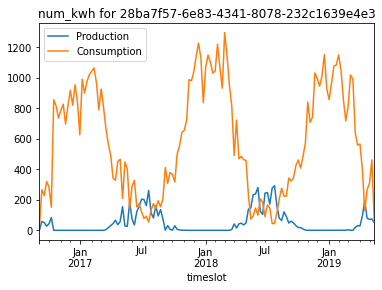

In [267]:
ax = prod_agg_week.plot(x='timeslot', y='num_kwh', title="num_kwh for " + meter_id_to_explore)
cons_agg_week.plot(ax=ax, x='timeslot', y='num_kwh')
ax.legend(["Production", "Consumption"])

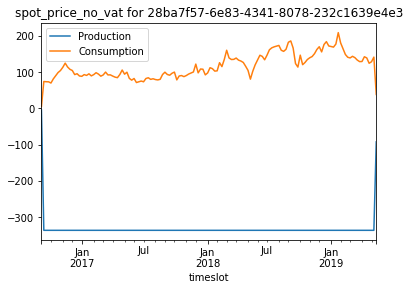

In [269]:
ax = prod_agg_week.plot(x='timeslot', y='spot_price_no_vat', legend=True, title="spot_price_no_vat for " + meter_id_to_explore)
cons_agg_week.plot(ax=ax, x='timeslot', y='spot_price_no_vat')
ax.legend(["Production", "Consumption"])

In [145]:
cons_agg.describe()

,num_kwh
count,21887.000000
mean,2.030482
std,1.602753
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,15.000000


<AxesSubplot:xlabel='timeslot'>

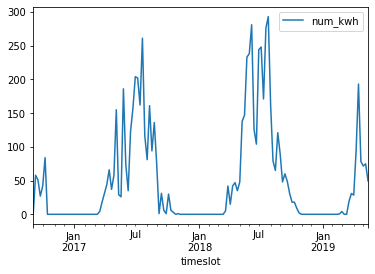

In [171]:
# plot dataframe by index   
prod_agg_week.plot(x='timeslot', y='num_kwh')

In [23]:
# print(df[["meter_id","timeslot"]].value_counts())


# df[(df["meter_id"] == "d63b305d-7049-4c56-b121-48478c7dfbb1") & (df["timeslot"] == "2018-06-30 00:00:00+02")]


df[df["num_kwh"] == 0.0]["amount_no_vat"].describe()


df[(df["num_kwh"] == 0.0) & (df["type"] == "consumption")].describe()

print("Consumption (num_kwh) below 0: {}".format(df[(df["type"] == "consumption") & (df["num_kwh"] < 0)].shape[0]))
print("Consumption (num_kwh) equal to 0: {}".format(df[(df["type"] == "consumption") & (df["num_kwh"] == 0)].shape[0]))
print("Consumption (num_kwh) above 0: {}".format(df[(df["type"] == "consumption") & (df["num_kwh"] > 0)].shape[0]))
print()
print("Production (num_kwh) below 0: {}".format(df[(df["type"] == "production") & (df["num_kwh"] < 0)].shape[0]))
print("Production (num_kwh) equal to 0: {}".format(df[(df["type"] == "production") & (df["num_kwh"] == 0)].shape[0]))
print("Production (num_kwh) above 0: {}".format(df[(df["type"] == "production") & (df["num_kwh"] > 0)].shape[0]))
print()
print("Elcert (num_kwh) below 0: {}".format(df[(df["type"] == "elcert") & (df["num_kwh"] < 0)].shape[0]))
print("Elcert (num_kwh) equal to 0: {}".format(df[(df["type"] == "elcert") & (df["num_kwh"] == 0)].shape[0]))
print("Elcert (num_kwh) above 0: {}".format(df[(df["type"] == "elcert") & (df["num_kwh"] > 0)].shape[0]))


Consumption (num_kwh) below 0: Delayed('int-edeb96b8-b54e-4392-ab9f-9a5463e3cc4d')
Consumption (num_kwh) equal to 0: Delayed('int-1b1125ba-af74-4cee-b2ae-be9092be4063')
Consumption (num_kwh) above 0: Delayed('int-66014e8d-3cb3-4b5e-bf30-e5cb353526f2')

Production (num_kwh) below 0: Delayed('int-909a5a92-314e-4ffb-b8b5-2a3b567f093a')
Production (num_kwh) equal to 0: Delayed('int-4f0244c9-d8c0-4597-9221-e9f650e7ba4d')
Production (num_kwh) above 0: Delayed('int-0b528777-6dc2-4f76-a940-7af3b46e3c08')

Elcert (num_kwh) below 0: Delayed('int-3e7046ff-2274-4a34-8ef8-3b53ce52952c')
Elcert (num_kwh) equal to 0: Delayed('int-9ec240d8-bf5d-47b5-94b1-8ee14c8aafef')
Elcert (num_kwh) above 0: Delayed('int-0bd9c6d7-87fb-4208-87af-960c095dc4d4')


In [26]:
type_sum = df.groupby(["meter_id", "type"], as_index=False).sum()

type_sum.shape[0]

type_sum["num_kwh"].describe()

# df[["meter_id", "type"]].drop_duplicates().shape[0]
# type_sum = df.group_by("meter_id")

0              consumption
1                   elcert
2      payment_consumption
3           payment_elcert
4              consumption
              ...         
129    payment_consumption
130            consumption
131    payment_consumption
132     payment_production
133             production
Name: type, Length: 134, dtype: object

In [311]:
type_sum.head()

Unnamed: 0  num_kwh  \
meter_id                             type                                       
07d1adfd-5898-4ba4-aeca-8c3a38158355 consumption            74261677  11722.0   
                                     elcert                 74238595  11722.0   
                                     payment_consumption     4235738      0.0   
                                     payment_elcert          3812648      0.0   
117e0012-3f28-4df4-906f-eb83b8a106ef consumption           985775306  25557.7   

                                                          spot_price_no_vat  \
meter_id                             type                                     
07d1adfd-5898-4ba4-aeca-8c3a38158355 consumption                  158.14900   
                                     elcert                        10.52000   
                                     payment_consumption            0.00000   
                                     payment_elcert                 0.00000   
117e0012-3f28-4df4-906f-eb83b8a106ef consumption                 4438.65811   

                                                          amount_no_vat  \
meter_id                             type                                 
07d1adfd-5898-4ba4-aeca-8c3a38158355 consumption               3502.632   
                                     elcert                     234.440   
                                     payment_consumption      -3502.650   
                                     payment_elcert            -234.400   
117e0012-3f28-4df4-906f-eb83b8a106ef consumption              13300.177   

                                                          amount_with_vat  \
meter_id                             type                                   
07d1adfd-5898-4ba4-aeca-8c3a38158355 consumption                 4378.294   
                                     elcert                       293.050   
                                     payment_consumption        -4378.290   
                                     payment_elcert              -293.050   
117e0012-3f28-4df4-906f-eb83b8a106ef consumption                16625.217   

                                                          vat_percent  \
meter_id                             type                               
07d1adfd-5898-4ba4-aeca-8c3a38158355 consumption                13150   
                                     elcert                     13150   
                                     payment_consumption          750   
                                     payment_elcert               675   
117e0012-3f28-4df4-906f-eb83b8a106ef consumption               242975   

                                                          ediel_product_code  \
meter_id                             type                                      
07d1adfd-5898-4ba4-aeca-8c3a38158355 consumption                    836866.0   
                                     elcert                         836866.0   
                                     payment_consumption                 0.0   
                                     payment_elcert                      0.0   
117e0012-3f28-4df4-906f-eb83b8a106ef consumption                  14491029.0   

                                                          kwh_fee_no_vat  
meter_id                             type                                 
07d1adfd-5898-4ba4-aeca-8c3a38158355 consumption                    0.00  
                                     elcert                         0.00  
                                     payment_consumption            0.00  
                                     payment_elcert                 0.00  
117e0012-3f28-4df4-906f-eb83b8a106ef consumption                  491.64

In [310]:
df = type_sum

print("Consumption (num_kwh) below 0: {}".format(df[(df["type"] == "consumption") & (df["num_kwh"] < 0)].shape[0]))
print("Consumption (num_kwh) equal to 0: {}".format(df[(df["type"] == "consumption") & (df["num_kwh"] == 0)].shape[0]))
print("Consumption (num_kwh) above 0: {}".format(df[(df["type"] == "consumption") & (df["num_kwh"] > 0)].shape[0]))
print()
print("Production (num_kwh) below 0: {}".format(df[(df["type"] == "production") & (df["num_kwh"] < 0)].shape[0]))
print("Production (num_kwh) equal to 0: {}".format(df[(df["type"] == "production") & (df["num_kwh"] == 0)].shape[0]))
print("Production (num_kwh) above 0: {}".format(df[(df["type"] == "production") & (df["num_kwh"] > 0)].shape[0]))
print()
print("Elcert (num_kwh) below 0: {}".format(df[(df["type"] == "elcert") & (df["num_kwh"] < 0)].shape[0]))
print("Elcert (num_kwh) equal to 0: {}".format(df[(df["type"] == "elcert") & (df["num_kwh"] == 0)].shape[0]))
print("Elcert (num_kwh) above 0: {}".format(df[(df["type"] == "elcert") & (df["num_kwh"] > 0)].shape[0]))

KeyError: 'type'